In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from scipy.stats import normaltest, shapiro, anderson

warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('/content/gas_daily.csv')

In [29]:
df.head(10)

,Date,Price
0,07/01/1997,3.82
1,08/01/1997,3.80
2,09/01/1997,3.61
3,10/01/1997,3.92
4,13/01/1997,4.00
5,14/01/1997,4.01
6,15/01/1997,4.34
7,16/01/1997,4.71
8,17/01/1997,3.91
9,20/01/1997,3.26


In [30]:
df.describe()

,Price
count,5952.000000
mean,4.184644
std,2.190361
min,1.050000
25%,2.650000
50%,3.530000
75%,5.240000
max,18.480000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5953 non-null   object 
 1   Price   5952 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.1+ KB


In [32]:
df.shape

(5953, 2)

In [33]:
df.isna().sum()

Date     0
Price    1
dtype: int64

In [34]:
df.dropna(inplace=True)


In [35]:
df['Date'].max()

'31/12/2019'

In [36]:
df['Date'].min()

'01/01/2016'

LINE CHART

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

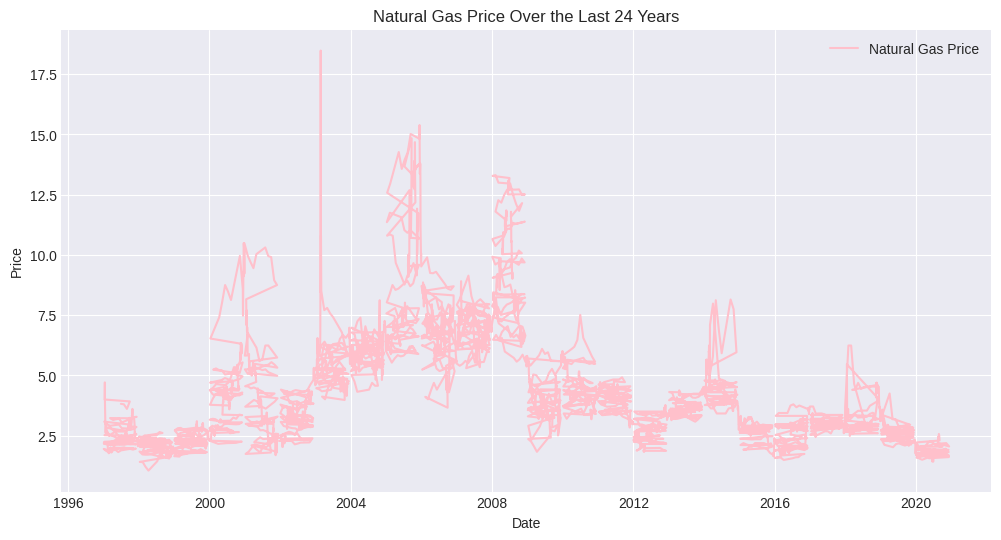

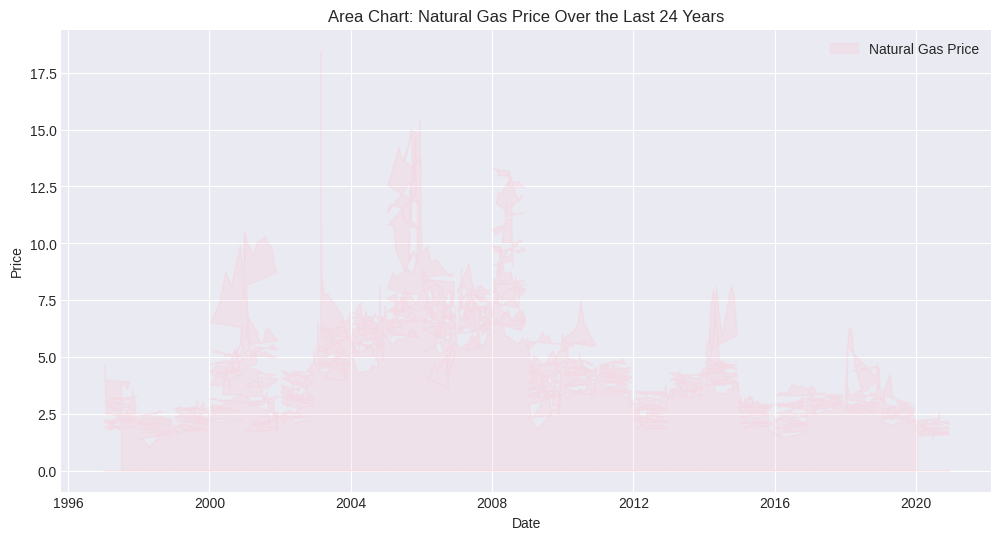

In [38]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Natural Gas Price', color='pink')
plt.title('Natural Gas Price Over the Last 24 Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.fill_between(df['Date'], df['Price'], color='pink', alpha=0.2, label='Natural Gas Price')
plt.title('Area Chart: Natural Gas Price Over the Last 24 Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

The line chart indicates a distinct trend in gas prices over the last two decades. Following a post-2000 upturn, prices remained consistently high between 2000 and 2009. However, a subsequent decline is evident, marking a shift in market dynamics.

 Explanatory variables

In [39]:
df.sort_values(by='Date', inplace=True)

df['MA5'] = df['Price'].rolling(window=5).mean()
df['MA10'] = df['Price'].rolling(window=10).mean()
df['MA20'] = df['Price'].rolling(window=20).mean()

df.dropna(inplace=True)

print(df[['Date', 'Price', 'MA5', 'MA10', 'MA20']])

           Date  Price    MA5   MA10    MA20
17   1997-01-30   2.86  2.884  3.059  3.0895
18   1997-01-31   2.77  2.914  2.945  3.1305
59   1997-02-04   1.85  2.688  2.804  3.1135
81   1997-02-05   2.21  2.520  2.726  3.1160
101  1997-02-06   2.20  2.378  2.641  3.1140
...         ...    ...    ...    ...     ...
5808 2020-12-02   1.91  1.906  1.898  1.9625
5830 2020-12-03   1.82  1.878  1.889  1.9275
5875 2020-12-05   1.61  1.860  1.878  1.8850
5897 2020-12-06   1.67  1.840  1.866  1.8535
5938 2020-12-08   2.05  1.812  1.853  1.8535

[5933 rows x 5 columns]


Training & Testing

In [40]:
from sklearn.model_selection import train_test_split


features = df[['MA5', 'MA10', 'MA20']]
target = df['Price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4746, 3)
X_test shape: (1187, 3)
y_train shape: (4746,)
y_test shape: (1187,)


In [41]:
features = df[['MA5', 'MA10', 'MA20']]
target = df['Price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [43]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4746, 3)
X_test shape: (1187, 3)
y_train shape: (4746,)
y_test shape: (1187,)


Building Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


model = LinearRegression()

model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training R^2 Score:", r2_train)
print("Testing R^2 Score:", r2_test)

Training RMSE: 0.7023196191348168
Testing RMSE: 0.6744025354238129
Training R^2 Score: 0.8973598880789414
Testing R^2 Score: 0.9053319409388314


Prediction Function and Result

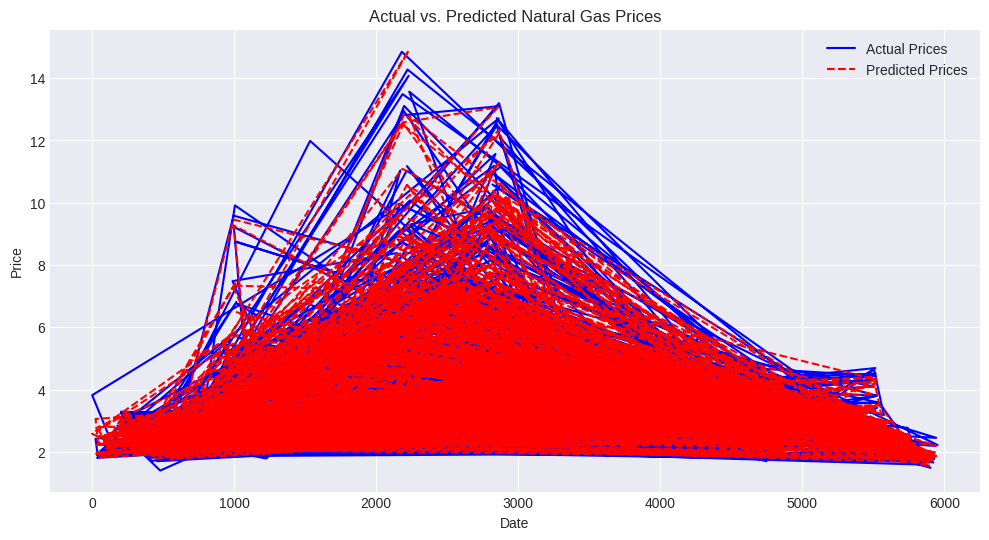

Model Accuracy (R^2 Score): 90.53319409388314


In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(X_test.index, test_predictions, label='Predicted Prices', color='red', linestyle='dashed')
plt.title('Actual vs. Predicted Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


r_squared = model.score(X_test, y_test)
accuracy = r_squared * 100
print("Model Accuracy (R^2 Score):", accuracy)

alpha and betas value

In [ ]:
alpha = model.intercept_
betas = model.coef_
print(alpha,betas)

0.018793686576505486 [ 1.18598754 -0.53534093  0.34660581]


In [ ]:
alpha = model.intercept_
betas = model.coef_

features = ['MA5', 'MA10', 'MA20']

equation = f"Y = {alpha:.2f} + " + " + ".join([f"{beta:.2f} * {feature}" for beta, feature in zip(betas, features)])
print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
Y = 0.02 + 1.19 * MA5 + -0.54 * MA10 + 0.35 * MA20
